In [82]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [83]:
data = pd.read_csv("BASE_AMBLIPIA.csv")
cl1=data[data["DIAGNOSTICO"]=="AMBLIOPIA REFRACTIVA (ANISOMETROPICA)"]
cl2=data[data["DIAGNOSTICO"]=="AMBLIOPIA REFRACTIVA"]
frames = [cl1,cl2]
data_final = pd.concat(frames)

In [84]:
catB=data_final.values[:,4]
cat=[0]*len(catB)
for i in range(len(catB)):
    if catB[i]=='AMBLIOPIA REFRACTIVA (ANISOMETROPICA)':
        cat[i]=1

In [85]:
X = data_final.values[:,range(5,13)]
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [86]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_X,cat,test_size=0.25,random_state=40)

In [87]:
pca = PCA(n_components = 3)
X_3=principalComponents = pca.fit_transform(X_train)


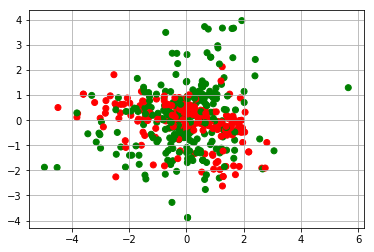

In [88]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(X_3[:,0], X_3[:,2],c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

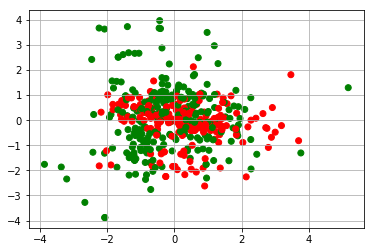

In [89]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(X_3[:,1], X_3[:,2],c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [90]:
k=0
for i in range(len(y_train)):
    if y_train[i] == 0:
        k+=1
j=0
X_fr= np.zeros((k,3))
for i in range(len(y_train)):
    if y_train[i] == 0:
        X_fr[j]= X_3[i,:]
        j+=1
j

207

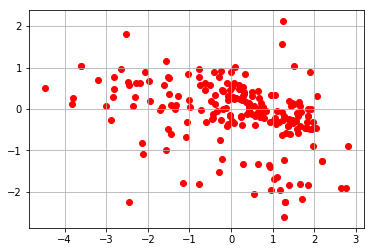

In [91]:
#X = cl2.values[:,range(5,13)]
#scaled_X = scaler.transform(X)
#X_is=principalComponents = pca.transform(scaled_X)
#X_c1_is = X_fr[:,0]
#X_c2_is = X_fr[:,2]

colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(X_fr[:,0], X_fr[:,2],c="red")

plt.show()

In [92]:
import statsmodels.api as sm

t = X_fr[:,[0,1]]
#t = sm.add_constant(t, prepend=False)
mod = sm.OLS(X_fr[:,2], t)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     25.41
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.38e-10
Time:                        11:18:50   Log-Likelihood:                -225.57
No. Observations:                 207   AIC:                             455.1
Df Residuals:                     205   BIC:                             461.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2385      0.036     -6.705      0.0

In [93]:
alfa = 1
res.params

array([-0.23849476, -0.17460929])

In [94]:
predictClass = [0]*len(y_train)
for i in range(len(y_train)):
    distance = abs(X_3[i,2]-(X_3[i,0]*res.params[0] +X_3[i,1]*res.params[1]))
    if distance > alfa*res.mse_resid :
        predictClass[i] = 1;

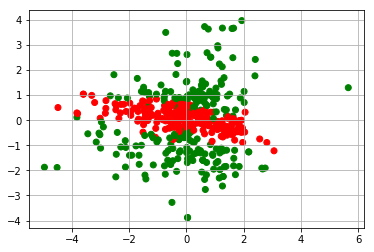

In [95]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(X_3[:,0], X_3[:,2],c=predictClass, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [96]:
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(range(len(catB)),cat,test_size=0.25,random_state=40)

X_3_T=principalComponents = pca.transform(X_test)
predictClassT = [0]*len(X_test)
for i in range(len(X_test)):
    distance = abs(X_3_T[i,2]-(X_3_T[i,0]*res.params[0]+X_3_T[i,1]*res.params[1]))
    if distance > alfa*res.mse_resid :
        predictClassT[i] = 1;
        
accuracy = accuracy_score(y_test,predictClassT)
accuracy

0.732484076433121

In [97]:
accuracy = accuracy_score(y_train,predictClass)
accuracy

0.7136752136752137

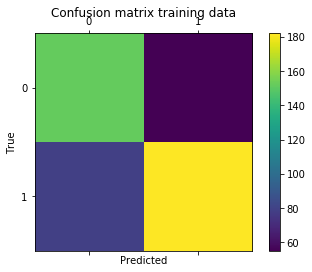

In [98]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train,predictClass)
labels = list(range(3))
#print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix training data')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

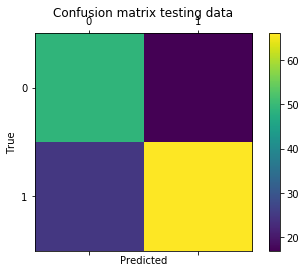

In [99]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,predictClassT)
labels = list(range(3))
#print(cnf_matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix)
plt.title('Confusion matrix testing data')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

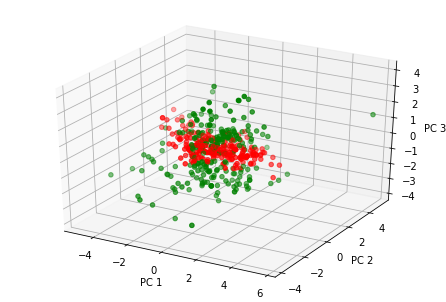

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green']
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2],c=predictClass, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

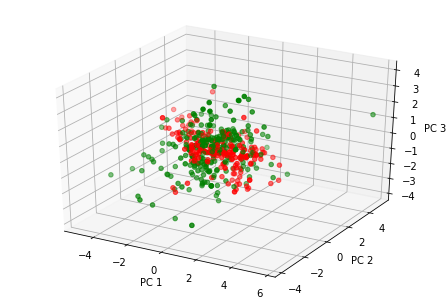

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
colors = ['red','green']
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2],c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()